In [16]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.utils import resample
import os
from datetime import datetime


In [81]:
fasted_base = "data/fasted/"
satiated_base = "data/satiated/"


In [25]:
def get_data(base):
    data = []
    for filename in sorted(os.listdir(base)):
        filepath = base + filename
        with open(filepath) as f:
            data.append({
                "datetime": f.readline().strip(),
                "data": np.loadtxt(filepath, skiprows=1, delimiter=',')
            })
    return data


In [26]:
fasted_data = get_data(fasted_base)
satiated_data = get_data(satiated_base)


In [102]:
wavelengths = ["610nm", "680nm", "730nm", "760nm", "810nm", "860nm"]
n_samples = 100

import warnings
warnings.filterwarnings("ignore")

def visualize(data):
    # Parse dates
    dates = []
    for item in data:
        parsed_datetime = datetime.strptime(item["datetime"],'%Y-%m-%d %H:%M:%S.%f')
        formatted_datetime = parsed_datetime.strftime('%d/%m %H:%M')
        dates.append(formatted_datetime)
        
    # Calculate p-values
    final_data = []
    for i, wavelength in enumerate(wavelengths):
        matrix = [[0 for x in range(len(data))] for y in range(len(data))]
        for xi, x in enumerate(data):
            data_x = x["data"]
            for yi, y in enumerate(data):
                data_y = y["data"]
                x_sampled = resample(data_x, replace=False, n_samples=n_samples)
                y_sampled = resample(data_y, replace=False, n_samples=n_samples)
                p_value = stats.ttest_ind(x_sampled[:, i], y_sampled[:, i]).pvalue
                matrix[xi][yi] = p_value
        final_data.append({
            "wavelength": wavelength,
            "data": matrix
        })
        
    # Plot p-values
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    for x in range(3):
        for y in range(2):
            ax = axs[x, y].matshow(final_data[x*2+y]["data"], interpolation='nearest')
            axs[x, y].set_title(final_data[x*2+y]["wavelength"])
            axs[x, y].set_xticklabels(['']+dates)
            axs[x, y].set_yticklabels(['']+dates)
            axs[x, y].tick_params(axis="x", labelrotation=45)
            fig.colorbar(ax)
    plt.show()


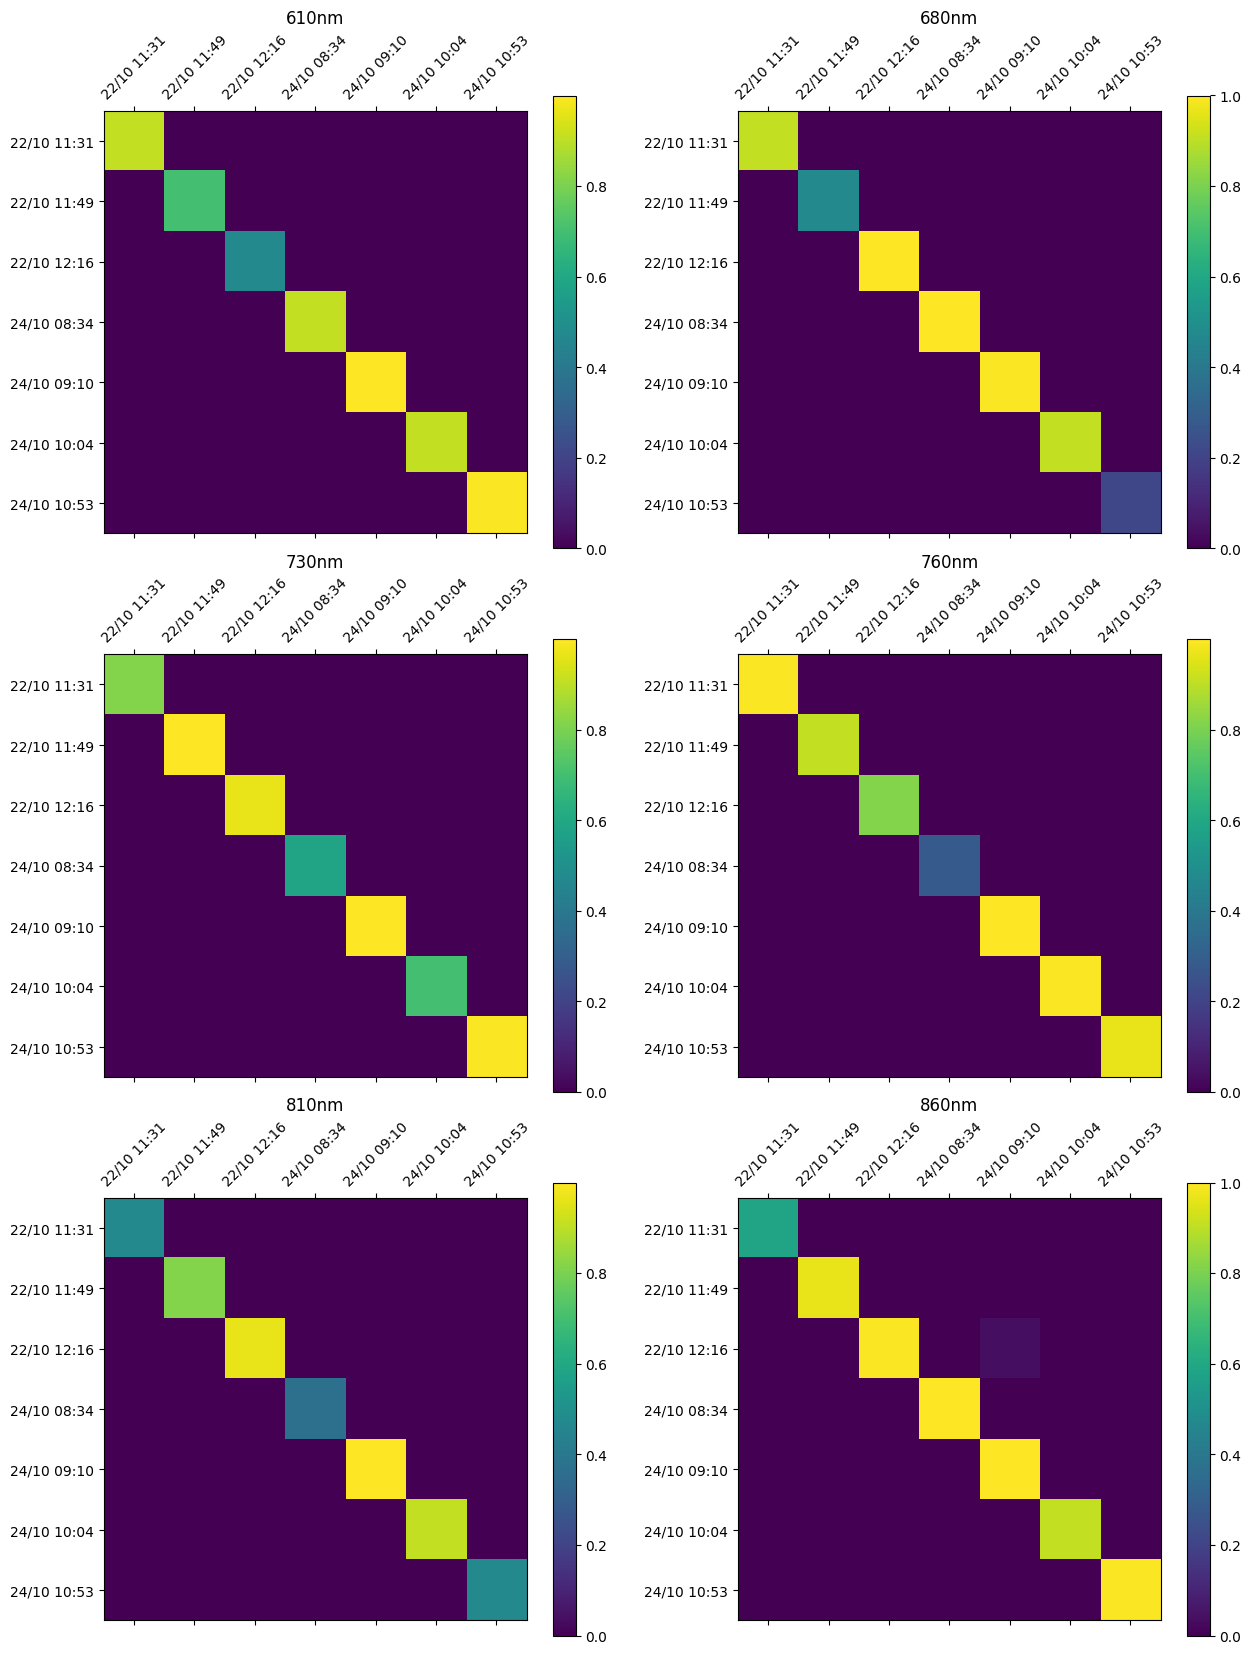

In [103]:
visualize(fasted_data)


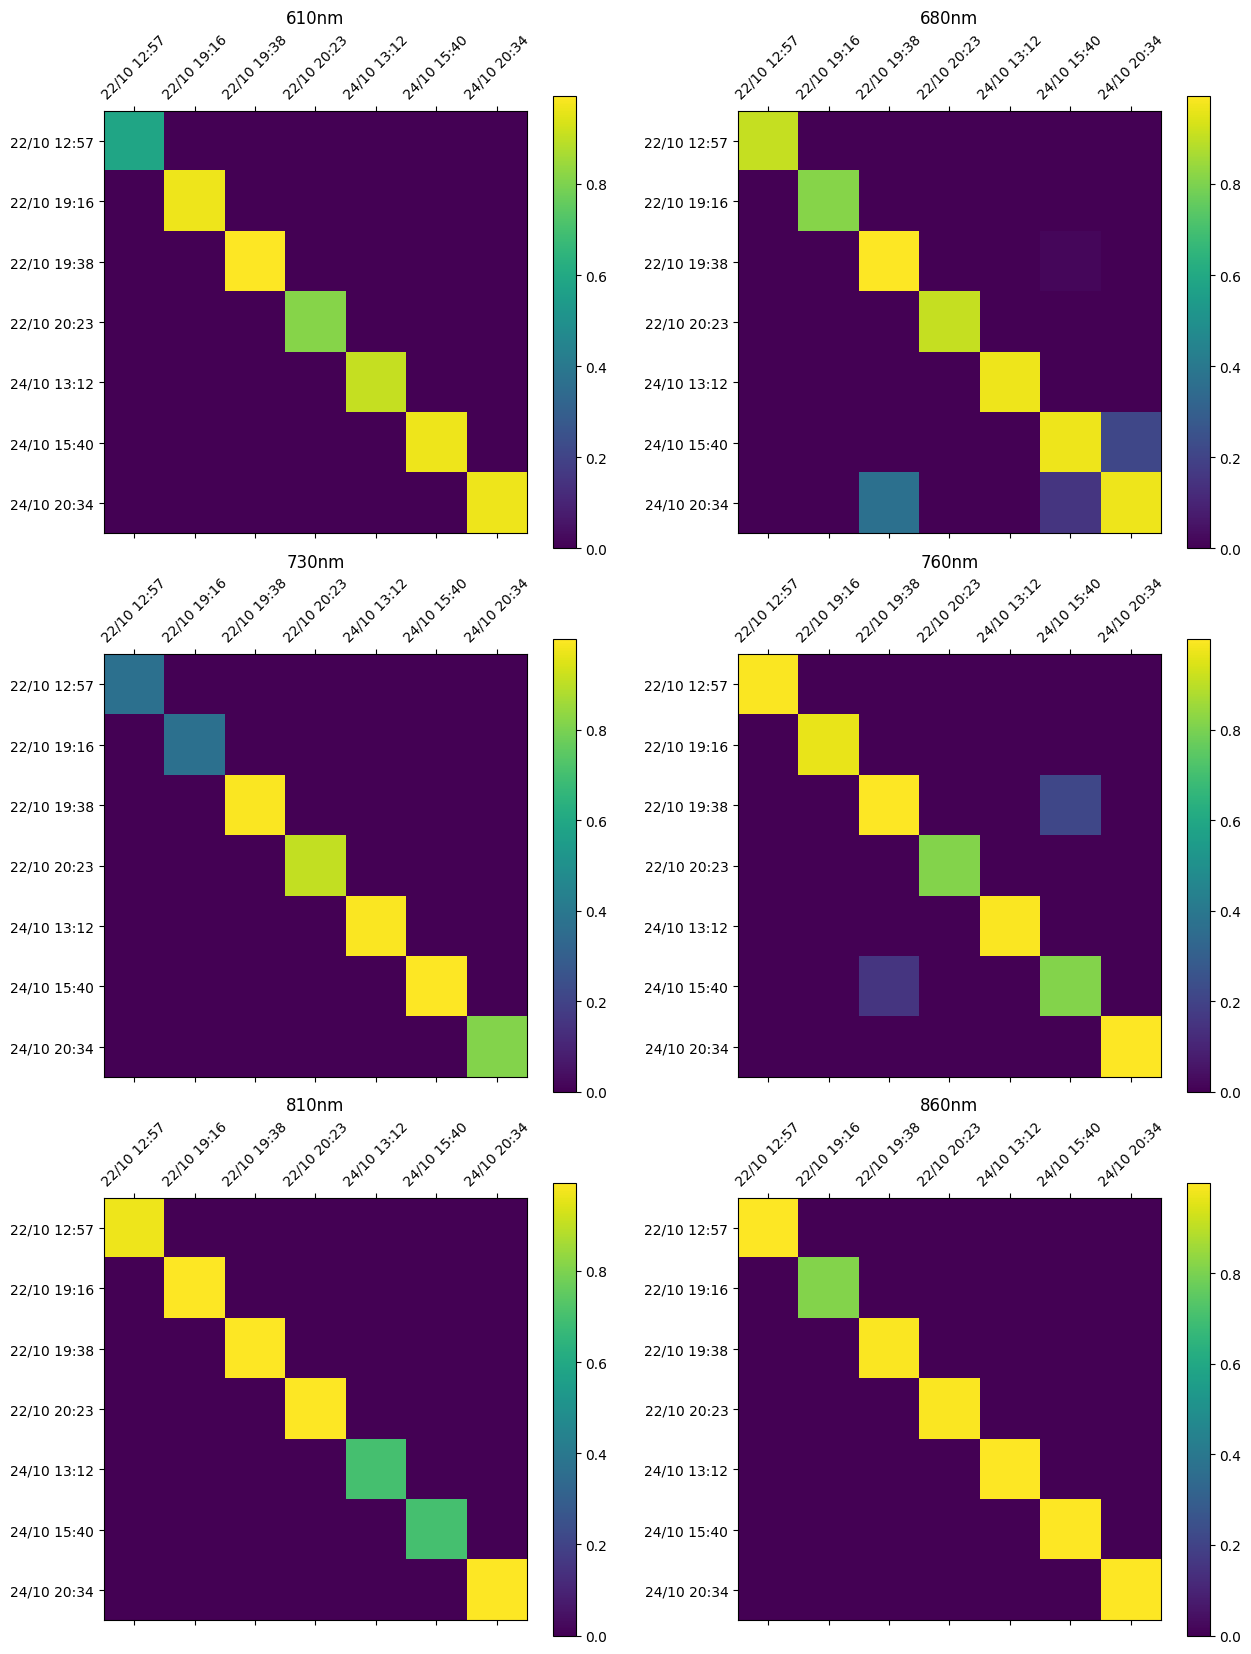

In [104]:
visualize(satiated_data)
